## **Plottable**

_Premier League 2023/24_

In [24]:
# imports
import pandas as pd
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from highlight_text import fig_text

from plottable import ColumnDefinition, Table
from plottable.cmap import normed_cmap
from plottable.plots import image
from PIL import Image
import urllib

Scrape data from [Fbref](https://fbref.com/), plot data with `Plottable` in `.py`

In [25]:
# read data from fbref
pl = pd.read_html('https://fbref.com/en/comps/9/Premier-League-Stats', attrs={'id': "results2023-202491_overall"})[0]

print(pl.shape)
print('')
print(pl.columns)
print('')
pl.head()

(20, 20)

Index(['Rk', 'Squad', 'MP', 'W', 'D', 'L', 'GF', 'GA', 'GD', 'Pts', 'Pts/MP',
       'xG', 'xGA', 'xGD', 'xGD/90', 'Last 5', 'Attendance', 'Top Team Scorer',
       'Goalkeeper', 'Notes'],
      dtype='object')



,Rk,Squad,MP,W,D,L,GF,GA,GD,Pts,Pts/MP,xG,xGA,xGD,xGD/90,Last 5,Attendance,Top Team Scorer,Goalkeeper,Notes
0,1,Arsenal,33,23,5,5,77,26,51,74,2.24,64.1,22.4,41.7,1.26,D W W L W,60224,Bukayo Saka - 14,David Raya,NaN
1,2,Liverpool,33,22,8,3,75,32,43,74,2.24,74.4,39.0,35.5,1.08,W W D L W,55498,Mohamed Salah - 17,Alisson,NaN
2,3,Manchester City,32,22,7,3,76,32,44,73,2.28,67.1,30.6,36.5,1.14,D D W W W,52923,Erling Haaland - 20,Ederson,NaN
3,4,Aston Villa,34,20,6,8,71,50,21,66,1.94,58.2,51.6,6.6,0.19,W L D W W,39482,Ollie Watkins - 19,Emiliano Martínez,NaN
4,5,Tottenham,32,18,6,8,65,49,16,60,1.88,55.5,52.9,2.6,0.08,L W D W L,61525,Son Heung-min - 15,Guglielmo Vicario,NaN


In [26]:
pl['Squad'] = pl['Squad'].replace('Manchester Utd', 'Manchester United')
pl['Squad'] = pl['Squad'].replace('Newcastle Utd', 'Newcastle United')
pl['Squad'] = pl['Squad'].replace('Nott\'ham Forest', 'Nottingham Forest')
pl['Squad'] = pl['Squad'].replace('Sheffield Utd', 'Sheffield United')
pl['Squad'] = pl['Squad'].replace('Tottenham', 'Tottenham Hotspur')
pl['Squad'] = pl['Squad'].replace('West Ham', 'West Ham United')
pl['Squad'] = pl['Squad'].replace('Wolves', 'Wolverhampton')

In [27]:
# read and insert Club's badges
pl['badge'] = pl['Squad'].apply(
    lambda x: f"../../logos/PremierLeague/{x.lower()}.png"
)

In [28]:
# data cleaning
pl[['xG', 'xGA', 'xGD', 'xGD/90']] = pl[['xG', 'xGA', 'xGD', 'xGD/90']].astype(float)

pl = pl[[
    'Rk', 'badge', 'Squad', 'MP', 'W', 'D', 'L', 'GF', 'GA', 'GD', 'Pts', 'Pts/MP', 'xG', 'xGA', 'xGD', 'xGD/90'
]]

In [29]:
# set up the colors

row_colors = {
    "top4": "#2d3636",
    "top6": "#273030",
    "relegation": "#313b3b",
    "even": "#627979",
    "odd": "#222222",
}

bg_color = row_colors["odd"]
text_color = "#bfa75d"

plt.rcParams["text.color"] = text_color
plt.rcParams["font.family"] = "monospace"

In [30]:
# create ColumnDefinitions for the table
# 1- load images
# 2- add color
# 3- add columns to groups

col_defs = [
    ColumnDefinition(
        name="Rk",
        textprops={"ha": "center"},
        width=0.5,
    ),
    ColumnDefinition(
        name="badge",
        textprops={"ha": "center", "va": "center", 'color': bg_color},
        width=0.5,
        plot_fn=image,
    ),
    ColumnDefinition(
        name="Squad",
        textprops={"ha": "left", "weight": "bold"},
        width=1.75,
    ),
    ColumnDefinition(
        name="MP",
        group="Matches Played",
        textprops={"ha": "center"},
        width=0.5,
    ),
    ColumnDefinition(
        name="W",
        group="Matches Played",
        textprops={"ha": "center"},
        width=0.5,
    ),
    ColumnDefinition(
        name="D",
        group="Matches Played",
        textprops={"ha": "center"},
        width=0.5,
    ),
    ColumnDefinition(
        name="L",
        group="Matches Played",
        textprops={"ha": "center"},
        width=0.5,
    ),
    ColumnDefinition(
        name="GF",
        group="Goals",
        textprops={"ha": "center"},
        width=0.5,
    ),
    ColumnDefinition(
        name="GA",
        group="Goals",
        textprops={"ha": "center"},
        width=0.5,
    ),
    ColumnDefinition(
        name="GD",
        group="Goals",
        textprops={"ha": "center"},
        width=0.5,
    ),
    ColumnDefinition(
        name="Pts",
        group="Points",
        textprops={"ha": "center"},
        width=0.5,
    ),
    ColumnDefinition(
        name="Pts/MP",
        group="Points",
        textprops={"ha": "center"},
        width=0.5,
    ),
    ColumnDefinition(
        name="xG",
        group="Expected Goals",
        textprops={"ha": "center", "weight": "bold", "bbox": {"boxstyle": "circle", "pad": 0.35}},
        cmap=normed_cmap(pl["xG"], cmap=matplotlib.cm.PiYG, num_stds=2)
    ),
    ColumnDefinition(
        name="xGA",
        group="Expected Goals",
        textprops={"ha": "center", "weight": "bold", "bbox": {"boxstyle": "circle", "pad": 0.35}},
        cmap=normed_cmap(pl["xGA"], cmap=matplotlib.cm.PiYG_r, num_stds=2)
    ),
    ColumnDefinition(
        name="xGD",
        group="Expected Goals",
        textprops={"ha": "center", "weight": "bold", "bbox": {"boxstyle": "circle", "pad": 0.35}},
        cmap=normed_cmap(pl["xGD"], cmap=matplotlib.cm.PiYG, num_stds=2)
    ),
]

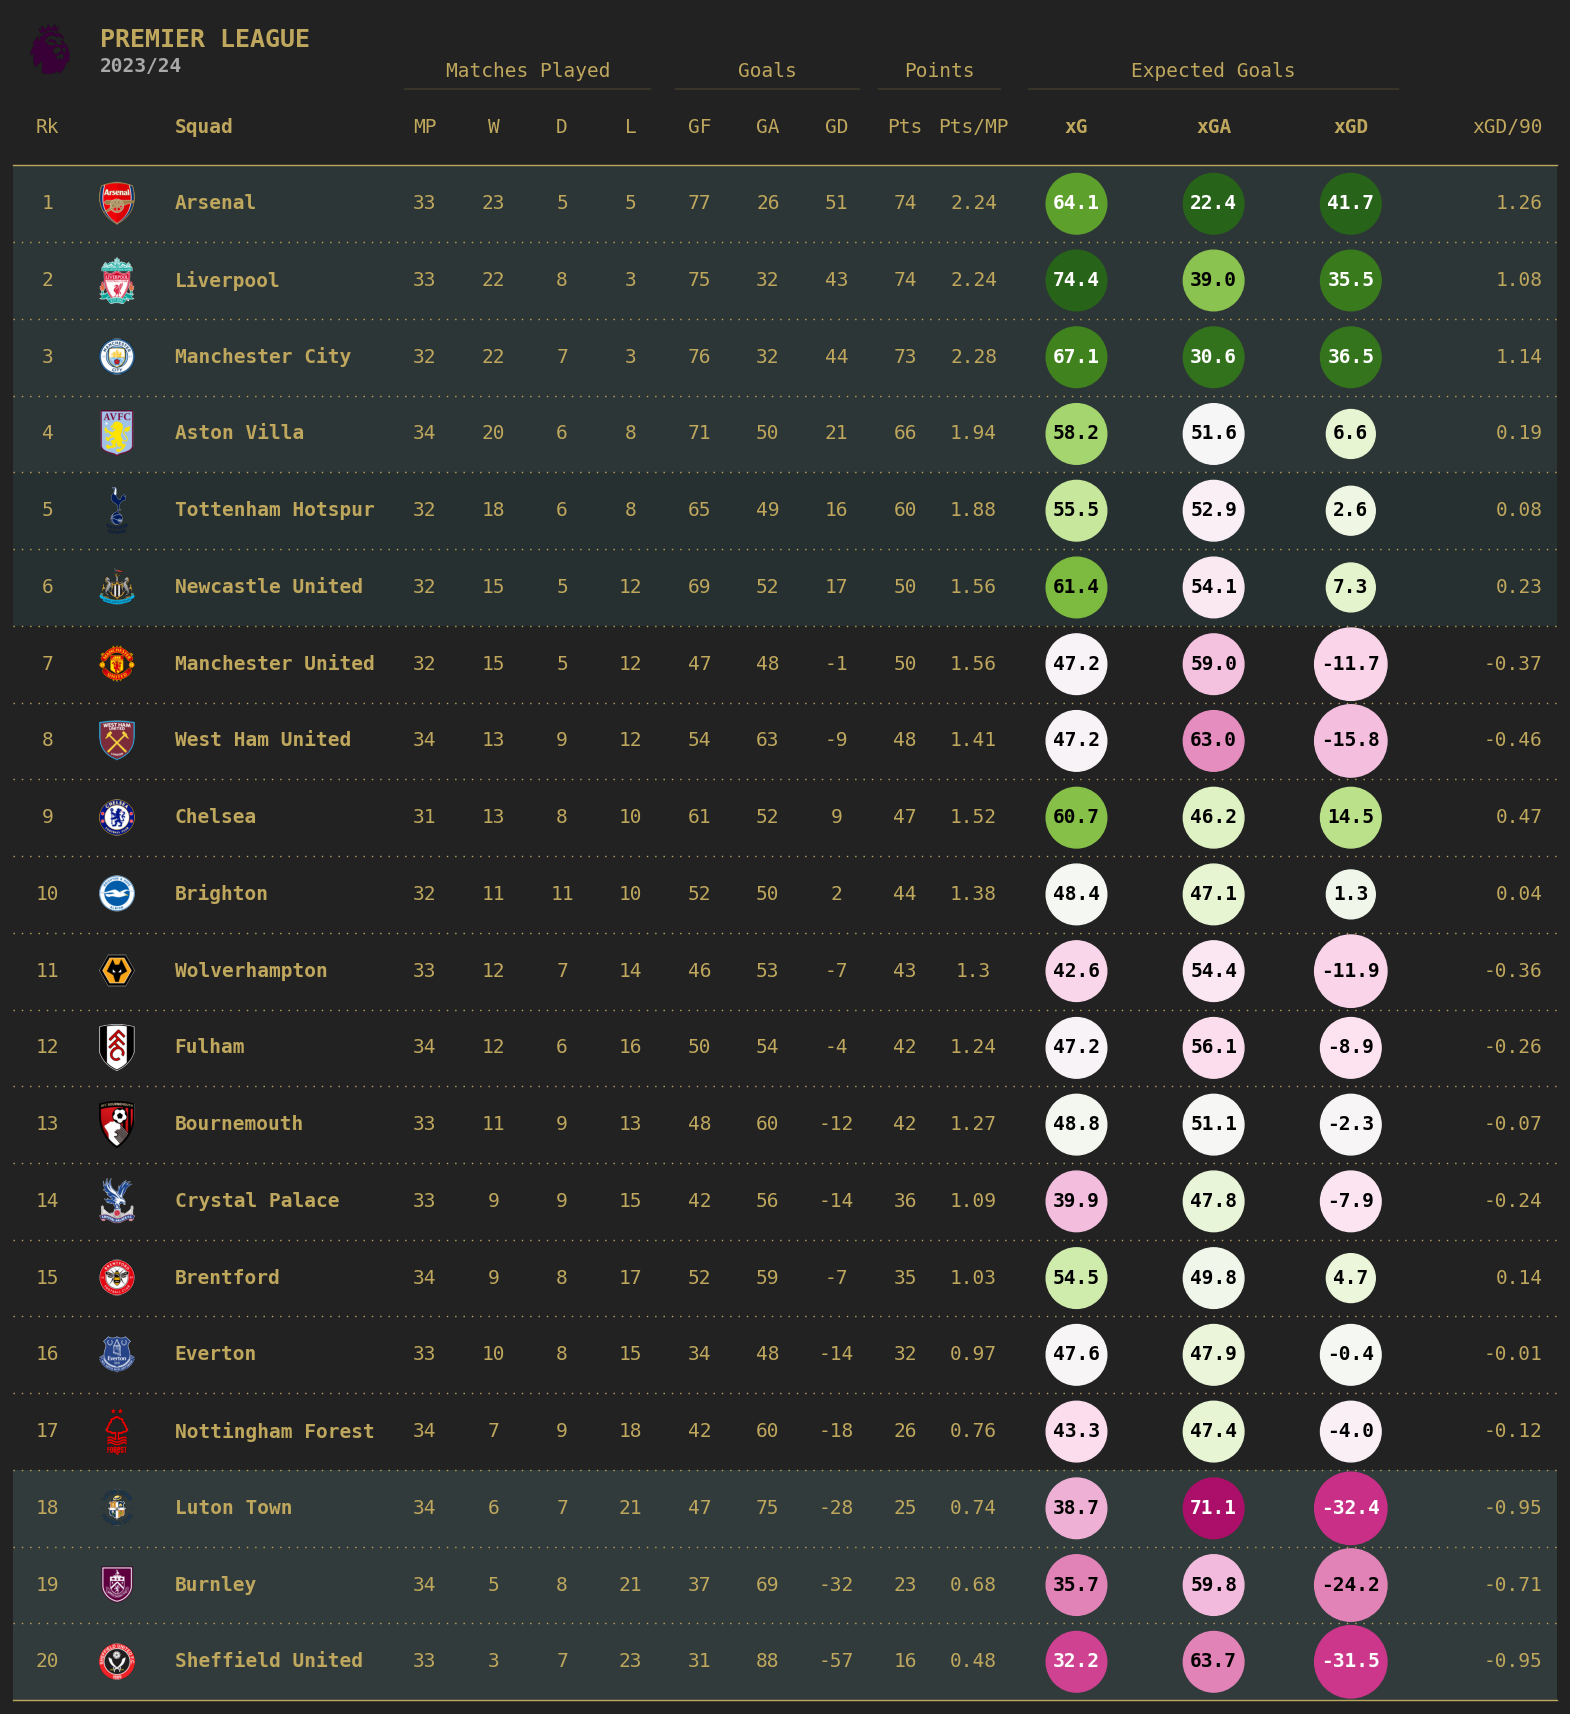

In [31]:
# create the table
fig, ax = plt.subplots(figsize=(20, 22))
fig.set_facecolor(bg_color)
ax.set_facecolor(bg_color)
table = Table(
    pl,
    column_definitions=col_defs,
    index_col="Rk",
    row_dividers=True,
    row_divider_kw={"linewidth": 1, "linestyle": (0, (1, 5))},
    footer_divider=True,
    textprops={"fontsize": 14},
    col_label_divider_kw={"linewidth": 1, "linestyle": "-"},
    column_border_kw={"linewidth": .5, "linestyle": "-"},
    ax=ax,
).autoset_fontcolors(colnames=["xG", "xGA", "xGD"]) # This will set the font color of the columns based on the cmap so the text is readable

table.cells[10, 3].textprops["color"] = "#8ACB88"

# title and subtitle for the legend
fig_text(
    x = 0.17, y = .872,
    s = "PREMIER LEAGUE\n<2023/24>",
    highlight_textprops=[
        {"color": "darkgrey", "weight": "bold", "size": 14}
    ],
    #color = "black",
    weight = "bold",
    size = 18,
    annotationbbox_kw={"xycoords": "figure fraction"}
)

fotmob_url_serieA = "https://images.fotmob.com/image_resources/logo/leaguelogo/47.png"

logo_ax = fig.add_axes([0.1325, 0.85, 0.025, 0.025], zorder=1) # position and then size 
league_icon = Image.open(urllib.request.urlopen(f"{fotmob_url_serieA}"))
logo_ax.imshow(league_icon)
logo_ax.axis("off")

# Optional: add colors to the rows

for idx in [0, 1, 2, 3]:
    table.rows[idx].set_facecolor(row_colors["top4"])
for idx in [4, 5]:
    table.rows[idx].set_facecolor(row_colors["top6"])
for idx in [17, 18, 19]:
    table.rows[idx].set_facecolor(row_colors["relegation"])

In [32]:
# save figure
fig.savefig("../figures/pl_2324_MD30.png", facecolor=ax.get_facecolor(), dpi=200, bbox_inches="tight")

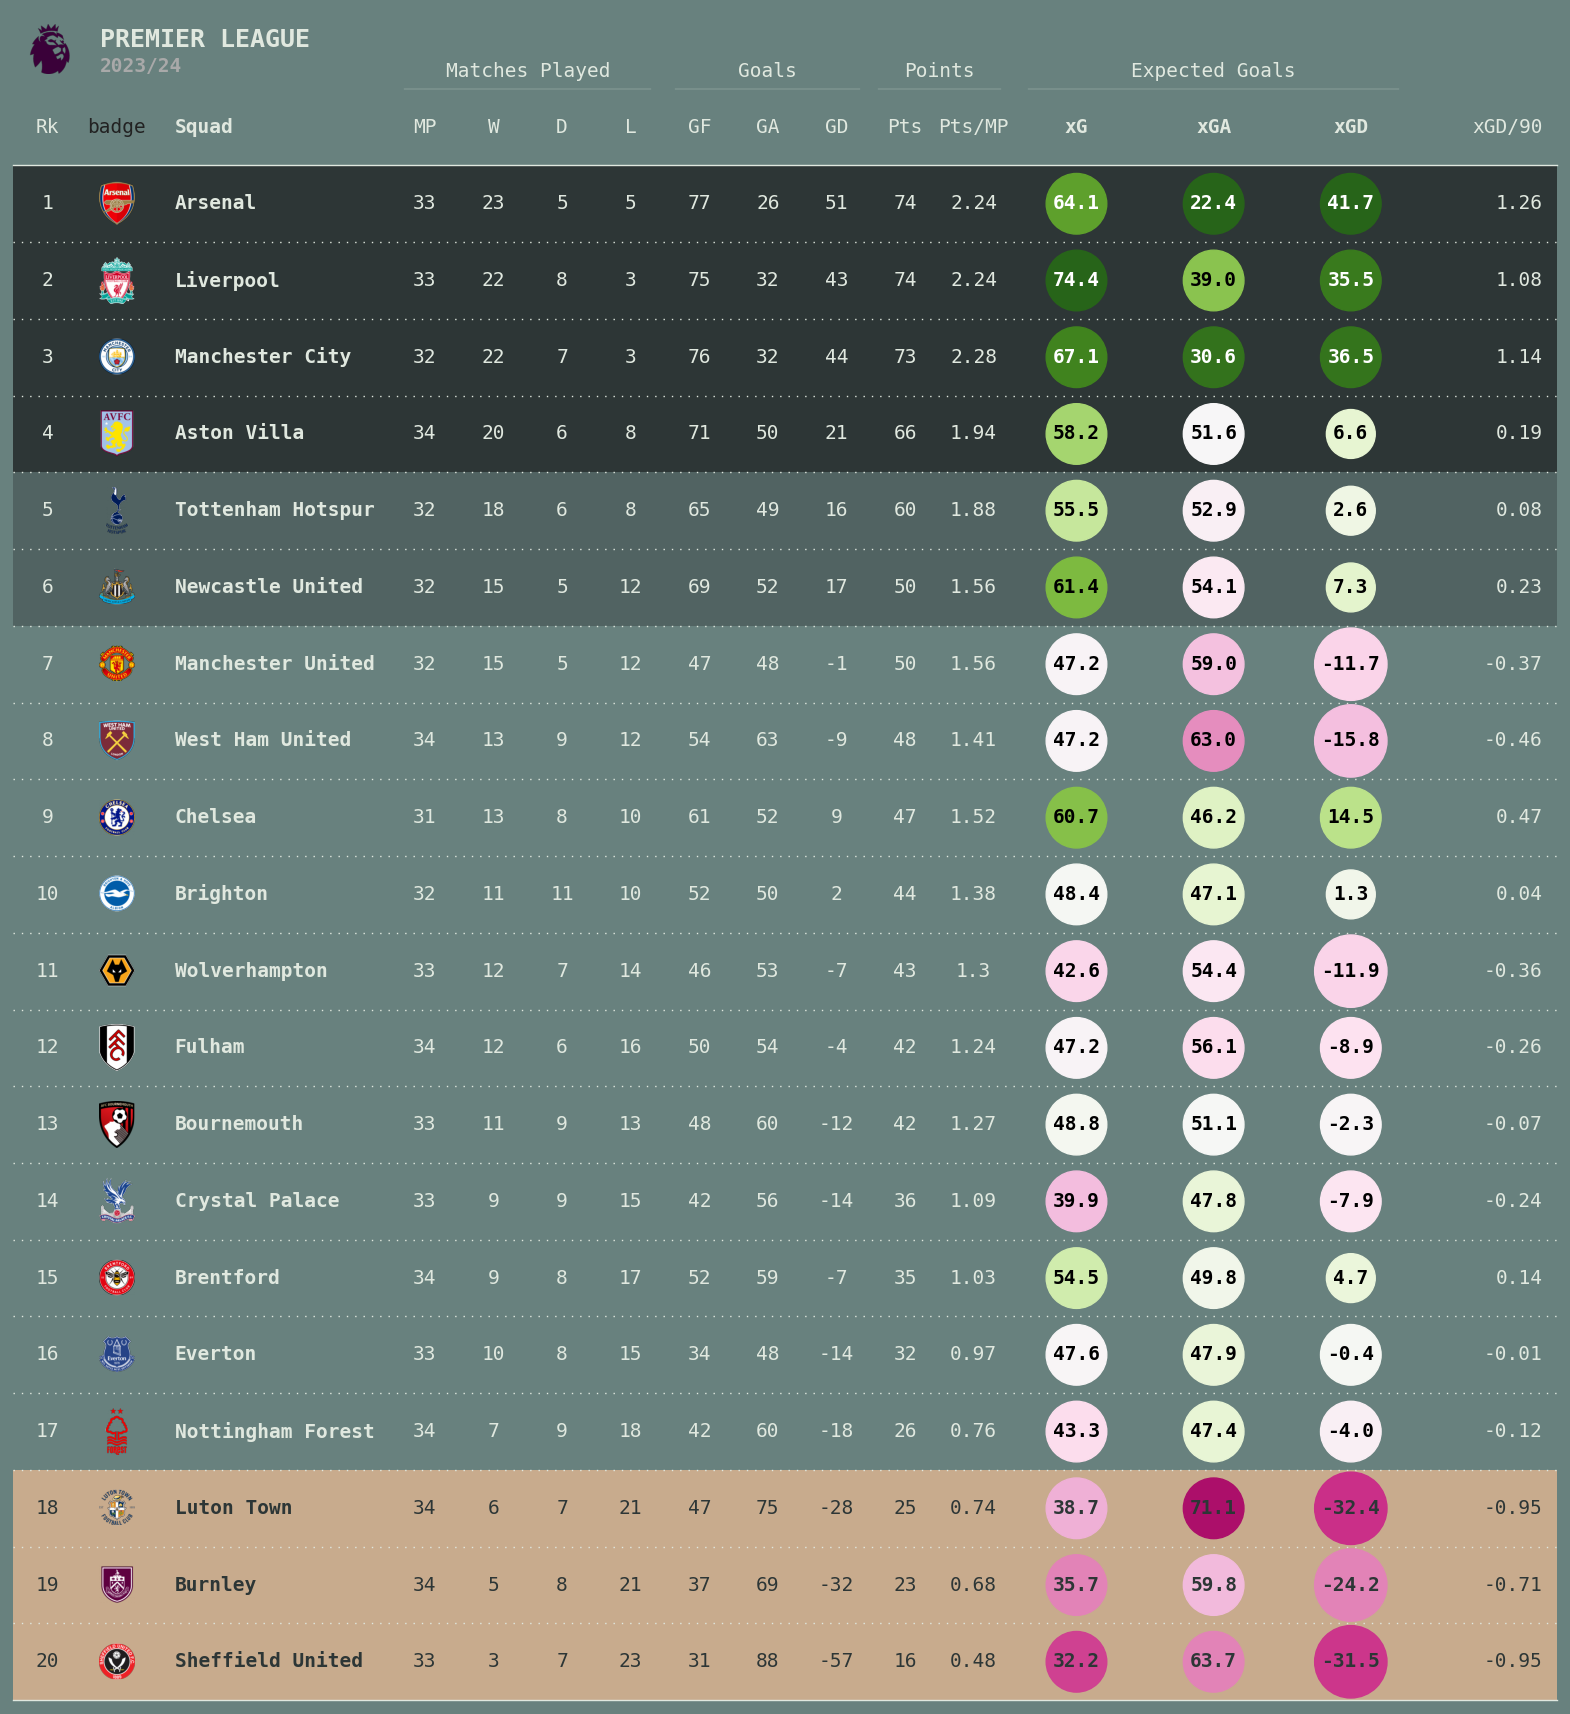

In [33]:
# set up the colors

row_colors = {
    "top4": "#2d3636",
    "top6": "#516362",
    "playoffs": "#8d9386",
    "relegation": "#c8ab8d",
    "even": "#627979",
    "odd": "#68817e",
}

bg_color = row_colors["odd"]
text_color = "#e0e8df"

plt.rcParams["text.color"] = text_color
plt.rcParams["font.family"] = "monospace"

# create the table
fig, ax = plt.subplots(figsize=(20, 22))
fig.set_facecolor(bg_color)
ax.set_facecolor(bg_color)
table = Table(
    pl,
    column_definitions=col_defs,
    index_col="Rk",
    row_dividers=True,
    row_divider_kw={"linewidth": 1, "linestyle": (0, (1, 5))},
    footer_divider=True,
    textprops={"fontsize": 14},
    col_label_divider_kw={"linewidth": 1, "linestyle": "-"},
    column_border_kw={"linewidth": .5, "linestyle": "-"},
    ax=ax,
).autoset_fontcolors(colnames=["xG", "xGA", "xGD"]) # This will set the font color of the columns based on the cmap so the text is readable

table.cells[10, 3].textprops["color"] = "#8ACB88"

# title and subtitle for the legend
fig_text(
    x = 0.17, y = .872,
    s = "PREMIER LEAGUE\n<2023/24>",
    highlight_textprops=[
        {"color": "darkgrey", "weight": "bold", "size": 14}
    ],
    #color = "black",
    weight = "bold",
    size = 18,
    annotationbbox_kw={"xycoords": "figure fraction"}
)

fotmob_url_serieA = "https://images.fotmob.com/image_resources/logo/leaguelogo/47.png"

logo_ax = fig.add_axes([0.1325, 0.85, 0.025, 0.025], zorder=1) # position and then size 
league_icon = Image.open(urllib.request.urlopen(f"{fotmob_url_serieA}"))
logo_ax.imshow(league_icon)
logo_ax.axis("off")

# Optional: add colors to the rows

for idx in [0, 1, 2, 3]:
    table.rows[idx].set_facecolor(row_colors["top4"])
for idx in [4, 5]:
    table.rows[idx].set_facecolor(row_colors["top6"])
for idx in [17, 18, 19]:
    table.rows[idx].set_facecolor(row_colors["relegation"])
    table.rows[idx].set_fontcolor(row_colors["top4"])